In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier

Loading the dataset to dataframe

In [2]:
df_kdd = pd.read_csv("ADM-kddcup_data-small.csv")
df_kdd

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,54540,8314,0,0,0,2,...,190,1.0,0.00,0.01,0.0,0.00,0.00,0.01,0.01,back.
1,0,tcp,http,SF,54540,8314,0,0,0,2,...,255,1.0,0.00,0.00,0.0,0.00,0.00,0.04,0.04,back.
2,0,tcp,http,SF,54540,8314,0,0,0,2,...,99,1.0,0.00,0.01,0.0,0.01,0.01,0.01,0.01,back.
3,0,tcp,http,SF,54540,8314,0,0,0,2,...,255,1.0,0.00,0.00,0.0,0.00,0.00,0.04,0.04,back.
4,0,tcp,http,SF,54540,8314,0,0,0,2,...,255,1.0,0.00,0.00,0.0,0.01,0.01,0.03,0.03,back.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23747,9,tcp,ftp_data,SF,0,5149533,0,0,0,0,...,14,1.0,0.00,1.00,0.0,0.00,0.00,0.00,0.00,warezmaster.
23748,156,tcp,ftp,SF,950,2551,0,0,0,18,...,1,0.0,0.03,0.00,0.0,0.01,0.00,0.07,0.00,warezmaster.
23749,9,tcp,ftp_data,SF,0,5153771,0,0,0,0,...,12,1.0,0.00,1.00,0.0,0.00,0.00,0.00,0.00,warezmaster.
23750,0,tcp,ftp,SF,36,197,0,0,0,0,...,1,0.0,0.05,0.00,0.0,0.39,0.00,0.05,0.00,warezmaster.


In [3]:
df_kdd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23752 entries, 0 to 23751
Data columns (total 42 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   duration                      23752 non-null  int64  
 1    protocol_type                23752 non-null  object 
 2    service                      23752 non-null  object 
 3    flag                         23752 non-null  object 
 4    src_bytes                    23752 non-null  int64  
 5    dst_bytes                    23752 non-null  int64  
 6    land                         23752 non-null  int64  
 7    wrong_fragment               23752 non-null  int64  
 8    urgent                       23752 non-null  int64  
 9    hot                          23752 non-null  int64  
 10   num_failed_logins            23752 non-null  int64  
 11   logged_in                    23752 non-null  int64  
 12   num_compromised              23752 non-null  int64  
 13   

dimension of the dataset

In [4]:
df_kdd.shape

(23752, 42)

visualizing the dataset using a normal bar chart

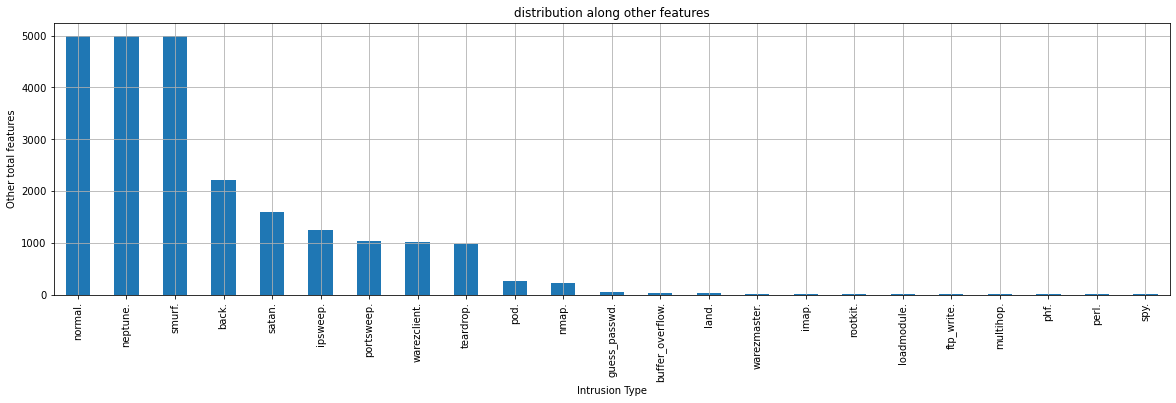

In [5]:
plt.figure(figsize=(20,5))
intrusion_type = df_kdd['label'].value_counts()
intrusion_type.plot(kind='bar')
plt.xlabel('Intrusion Type')
plt.ylabel('Other total features')
plt.title('distribution along other features')
plt.grid()
plt.show()

<h1>Data Preprocessing</h1>

In [6]:
#Is there are any null values?
sum(df_kdd.isna().any())

0

In [7]:
#Droping duplicates
df_kdd.drop_duplicates(keep='first', inplace = True)
df_kdd.shape

(14723, 42)

In [8]:
#Unique intrusion types
df_kdd['label'].unique()

array(['back.', 'buffer_overflow.', 'ftp_write.', 'guess_passwd.',
       'imap.', 'ipsweep.', 'land.', 'loadmodule.', 'multihop.',
       'neptune.', 'nmap.', 'normal.', 'perl.', 'phf.', 'pod.',
       'portsweep.', 'rootkit.', 'satan.', 'smurf.', 'spy.', 'teardrop.',
       'warezclient.', 'warezmaster.'], dtype=object)

In [9]:
#Identify and Convert categorical data to numerical
categorica_columns = []
new_category_coulmns = []
for colum in df_kdd.columns:
    if df_kdd[colum].dtypes == 'object' :
        categorica_columns.append(colum)
        unique_category = len(df_kdd[colum].unique())
        print(f'{colum} and unique values in the {unique_category}')
        if colum == 'label':
            continue
        for j in df_kdd[colum].unique():
            new_category_coulmns.append(f'{colum.strip()}_{j}')

 protocol_type and unique values in the 3
 service and unique values in the 64
 flag and unique values in the 11
label and unique values in the 23


In [10]:
print(categorica_columns)

[' protocol_type', ' service', ' flag', 'label']


In [11]:
print(new_category_coulmns)

['protocol_type_tcp', 'protocol_type_icmp', 'protocol_type_udp', 'service_http', 'service_telnet', 'service_ftp_data', 'service_ftp', 'service_login', 'service_imap4', 'service_eco_i', 'service_private', 'service_mtp', 'service_remote_job', 'service_gopher', 'service_time', 'service_ssh', 'service_ecr_i', 'service_link', 'service_name', 'service_whois', 'service_finger', 'service_domain', 'service_smtp', 'service_rje', 'service_daytime', 'service_systat', 'service_Z39_50', 'service_echo', 'service_nntp', 'service_hostnames', 'service_sql_net', 'service_iso_tsap', 'service_supdup', 'service_netbios_ns', 'service_courier', 'service_kshell', 'service_discard', 'service_netbios_ssn', 'service_printer', 'service_klogin', 'service_exec', 'service_ctf', 'service_bgp', 'service_http_443', 'service_other', 'service_sunrpc', 'service_netbios_dgm', 'service_nnsp', 'service_uucp', 'service_csnet_ns', 'service_uucp_path', 'service_efs', 'service_ldap', 'service_auth', 'service_pop_2', 'service_pop_

In [12]:
#Feature columns except label should be flattened
cat_coulmns = [' protocol_type', ' service', ' flag']
new_df_kdd = df_kdd.copy()
df_categories = df_kdd[cat_coulmns].copy()
df_categories

,protocol_type,service,flag
0,tcp,http,SF
1,tcp,http,SF
2,tcp,http,SF
3,tcp,http,SF
4,tcp,http,SF
...,...,...,...
23747,tcp,ftp_data,SF
23748,tcp,ftp,SF
23749,tcp,ftp_data,SF
23750,tcp,ftp,SF


Reference for dummy value, label encoding and one hot encoding: https://towardsdatascience.com/categorical-encoding-using-label-encoding-and-one-hot-encoder-911ef77fb5bd

In [13]:
#label encoding
label_encoder = LabelEncoder()
df_categories = df_categories.apply(label_encoder.fit_transform)
df_categories

,protocol_type,service,flag
0,1,22,9
1,1,22,9
2,1,22,9
3,1,22,9
4,1,22,9
...,...,...,...
23747,1,19,9
23748,1,18,9
23749,1,19,9
23750,1,18,9


In [14]:
#one hot encoding
one_hot_encoder = OneHotEncoder()
df_categories_with_one_hot_encoding = pd.DataFrame(
    one_hot_encoder.fit_transform(
        df_categories[cat_coulmns]).toarray(),
        columns=new_category_coulmns)

new_df_kdd = new_df_kdd.join(df_categories_with_one_hot_encoding)
new_df_kdd.drop(cat_coulmns, axis=1, inplace=True)
new_df_kdd

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_RSTR,flag_S2,flag_S1,flag_RSTO,flag_S3,flag_SH,flag_S0,flag_REJ,flag_RSTOS0,flag_OTH
0,0,54540,8314,0,0,0,2,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,54540,8314,0,0,0,2,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,54540,8314,0,0,0,2,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0,54540,8314,0,0,0,2,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0,54540,8314,0,0,0,2,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23747,9,0,5149533,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23748,156,950,2551,0,0,0,18,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23749,9,0,5153771,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23750,0,36,197,0,0,0,0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Split dataset into 4 based on generalising the intrusions categories:
Attacks are of four categories:
DOS: denial-of-service
R2L: unauthorized access from a remote machine
U2R: unauthorized access to local root privileges
probing: surveillance and another probing

Because multi-class problems make learning more difficult, they can be decomposed into multi-label problems by limiting each instance to to one label (multiple independent binary classification problems).
reference: https://towardsdatascience.com/journey-to-the-center-of-multi-label-classification-384c40229bff
Hence after classifying the label values under these types, we can now split the dataset to 4 types.
DOS with normal
R2L with normal
U2R with normal
Probing with normal



To generalise label values
{'back.': 'DoS',
 'buffer_overflow.': 'U2R',
 'ftp_write.': 'R2L',
 'guess_passwd.': 'R2L',
 'imap.': 'R2L',
 'ipsweep.': 'Probe',
 'land.': 'DoS',
 'loadmodule.': 'U2R',
 'multihop.': 'R2L',
 'neptune.': 'DoS',
 'nmap.': 'Probe',
 'normal.': 'normal',
 'perl.': 'U2R',
 'phf.': 'R2L',
 'pod.': 'DoS',
 'portsweep.': 'Probe',
 'rootkit.': 'U2R',
 'satan.': 'Probe',
 'smurf.': 'DoS',
 'spy.': 'R2L',
 'teardrop.': 'DoS',
 'warezclient.': 'R2L',
 'warezmaster.': 'R2L'}

Hence we also need to convert these generalisation to numerical
normal = 0
dos = 1
probe = 2
r2l = 3
u2r = 4

In [15]:
new_df_kdd_label_col = new_df_kdd['label']
new_df_kdd_label_col = new_df_kdd_label_col.replace({'back.': 1, 'buffer_overflow.': 4, 'ftp_write.': 3, 'guess_passwd.': 3, 'imap.': 3, 'ipsweep.': 2, 'land.': 1, 'loadmodule.': 4, 'multihop.': 3, 'neptune.': 1, 'nmap.': 2, 'normal.': 0, 'perl.': 4, 'phf.': 3, 'pod.': 1, 'portsweep.': 2, 'rootkit.': 4, 'satan.': 2, 'smurf.': 1, 'spy.': 3, 'teardrop.': 1, 'warezclient.': 3, 'warezmaster.': 3})
new_df_kdd['label'] = new_df_kdd_label_col

In [16]:
new_df_kdd['label'].head()

0    1
1    1
2    1
3    1
4    1
Name: label, dtype: int64

Remove coorelated data, Refer: https://stackabuse.com/applying-filter-methods-in-python-for-feature-selection/

In [17]:
cor_features = set()
cor_matrix = new_df_kdd.corr()
cor_threashold = 0.8
for i in range(len(cor_matrix.columns)):
    for j in range(i):
        if not abs(cor_matrix.iloc[i, j]) > cor_threashold:
            continue
        colname = cor_matrix.columns[i]
        cor_features.add(colname)
print(len(cor_features))
print(cor_features)

10
{' srv_serror_rate', ' su_attempted', ' dst_host_srv_serror_rate', ' dst_host_serror_rate', 'protocol_type_udp', ' is_guest_login', ' dst_host_srv_rerror_rate', ' num_root', ' dst_host_rerror_rate', ' srv_rerror_rate'}


In [18]:
# Drop the coorelated features
new_df_kdd.drop(labels=cor_features, axis=1, inplace=True)

In [19]:
train, test = train_test_split(new_df_kdd, test_size = 0.33, random_state = 42)

In [20]:
# construct training and testing data set for each attack categories mentioned above
df_train_dos = train.loc[train['label'].isin([0,1])]

df_train_probe = train.loc[train['label'].isin([0,2])]
df_train_probe["label"].replace({2: 1}, inplace=True)

df_train_r2l = train.loc[train['label'].isin([0,3])]
df_train_r2l["label"].replace({3: 1}, inplace=True)

df_train_u2r = train.loc[train['label'].isin([0,4])]
df_train_u2r["label"].replace({4: 1}, inplace=True)

#############################################################################

df_test_dos = test.loc[new_df_kdd['label'].isin([0,1])]

df_test_probe = test.loc[test['label'].isin([0,2])]
df_test_probe["label"].replace({2: 1}, inplace=True)

df_test_r2l = test.loc[test['label'].isin([0,3])]
df_test_r2l["label"].replace({3: 1}, inplace=True)

df_test_u2r = test.loc[test['label'].isin([0,4])]
df_test_u2r["label"].replace({4: 1}, inplace=True)

C:\Users\hp\anaconda3\lib\site-packages\pandas\core\series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [21]:
# Seperate independant and dependant variables of each dataset
train_dos_x = df_train_dos.drop('label', 1)
train_dos_y = df_train_dos['label']

train_probe_x = df_train_probe.drop('label', 1)
train_probe_y = df_train_probe['label']

train_r2l_x = df_train_r2l.drop('label', 1)
train_r2l_y = df_train_r2l['label']

train_u2r_x = df_train_u2r.drop('label', 1)
train_u2r_y = df_train_u2r['label']

##########################################################

test_dos_x = df_test_dos.drop('label', 1)
test_dos_y = df_test_dos['label']

test_probe_x = df_test_probe.drop('label', 1)
test_probe_y = df_test_probe['label']

test_r2l_x = df_test_r2l.drop('label', 1)
test_r2l_y = df_test_r2l['label']

test_u2r_x = df_test_u2r.drop('label', 1)
test_u2r_y = df_test_u2r['label']

In [22]:
# Apply standardisation
train_dos_x = StandardScaler().fit_transform(train_dos_x)
test_dos_x = StandardScaler().fit_transform(test_dos_x)

train_probe_x = StandardScaler().fit_transform(train_probe_x)
test_probe_x = StandardScaler().fit_transform(test_probe_x)

train_r2l_x = StandardScaler().fit_transform(train_r2l_x)
test_r2l_x = StandardScaler().fit_transform(test_r2l_x)

train_u2r_x = StandardScaler().fit_transform(train_u2r_x)
test_u2r_x = StandardScaler().fit_transform(test_u2r_x)

<h1>Feature Selection</h1>

Automatic Feature Selection Using RFE & Decision Tree Reference: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html

In [23]:
clf = DecisionTreeClassifier(random_state=0)

rfe_selector = RFE(estimator=clf, n_features_to_select=13, step=1)
rfe_selector.fit_transform(train_dos_x.astype(int), train_dos_y.astype(int))
rfe_selected_features = []
for indx, val in enumerate(rfe_selector.support_):
    if val:
        rfe_selected_features.append(list(df_train_dos.columns)[indx])
print(f"RFE selected feature for DoS with DecisionTree Classifier are {rfe_selected_features} \n\n")

rfe_selector = RFE(estimator=clf, n_features_to_select=13, step=1)
rfe_selector.fit_transform(train_probe_x.astype(int), train_probe_y.astype(int))
rfe_selected_features = []
for indx, val in enumerate(rfe_selector.support_):
    if val:
        rfe_selected_features.append(list(df_train_probe.columns)[indx])
print(f"RFE selected feature for Probe with DecisionTree Classifier are {rfe_selected_features} \n\n")

rfe_selector = RFE(estimator=clf, n_features_to_select=13, step=1)
rfe_selector.fit_transform(train_r2l_x.astype(int), train_r2l_y)
rfe_selected_features = []
for indx, val in enumerate(rfe_selector.support_):
    if val:
        rfe_selected_features.append(list(df_train_r2l.columns)[indx])
print(f"RFE selected feature for R2L with DecisionTree Classifier are {rfe_selected_features} \n\n")

rfe_selector = RFE(estimator=clf, n_features_to_select=13, step=1)
rfe_selector.fit_transform(train_u2r_x.astype(int), train_u2r_y.astype(int))
rfe_selected_features = []
for indx, val in enumerate(rfe_selector.support_):
    if val:
        rfe_selected_features.append(list(df_train_u2r.columns)[indx])
print(f"RFE selected feature for U2R with DecisionTree Classifier are {rfe_selected_features} ")

RFE selected feature for DoS with DecisionTree Classifier are ['duration', ' src_bytes', ' hot', ' logged_in', ' num_compromised', ' serror_rate', ' rerror_rate', ' same_srv_rate', ' diff_srv_rate', ' dst_host_count', ' dst_host_srv_count', 'service_finger', 'service_domain'] 


RFE selected feature for Probe with DecisionTree Classifier are [' logged_in', ' serror_rate', ' rerror_rate', ' srv_diff_host_rate', ' dst_host_same_srv_rate', ' dst_host_same_src_port_rate', ' dst_host_srv_diff_host_rate', 'service_finger', 'service_domain', 'service_bgp', 'flag_SF', 'flag_S1', 'flag_REJ'] 


RFE selected feature for R2L with DecisionTree Classifier are [' urgent', ' num_failed_logins', ' logged_in', ' num_compromised', ' root_shell', ' num_file_creations', ' serror_rate', ' srv_diff_host_rate', ' dst_host_count', ' dst_host_srv_count', ' dst_host_same_src_port_rate', 'service_nnsp', 'flag_RSTO'] 


RFE selected feature for U2R with DecisionTree Classifier are [' root_shell', ' num_file_creat

In [24]:
df_train_dos.columns

Index(['duration', ' src_bytes', ' dst_bytes', ' land', ' wrong_fragment',
       ' urgent', ' hot', ' num_failed_logins', ' logged_in',
       ' num_compromised',
       ...
       'flag_RSTR', 'flag_S2', 'flag_S1', 'flag_RSTO', 'flag_S3', 'flag_SH',
       'flag_S0', 'flag_REJ', 'flag_RSTOS0', 'flag_OTH'],
      dtype='object', length=107)

In [25]:
train_dos_x = StandardScaler().fit_transform(df_train_dos[['duration', ' src_bytes', ' hot', ' logged_in', ' num_compromised', ' serror_rate', ' rerror_rate', ' same_srv_rate', ' diff_srv_rate', ' dst_host_count', ' dst_host_srv_count', 'service_finger', 'service_domain']])
test_dos_x = StandardScaler().fit_transform(df_test_dos[['duration', ' src_bytes', ' hot', ' logged_in', ' num_compromised', ' serror_rate', ' rerror_rate', ' same_srv_rate', ' diff_srv_rate', ' dst_host_count', ' dst_host_srv_count', 'service_finger', 'service_domain']])

train_probe_x = StandardScaler().fit_transform(df_train_probe[[' logged_in', ' serror_rate', ' rerror_rate', ' srv_diff_host_rate', ' dst_host_same_srv_rate', ' dst_host_same_src_port_rate', ' dst_host_srv_diff_host_rate', 'service_finger', 'service_domain', 'service_bgp', 'flag_SF', 'flag_S1', 'flag_REJ']])
test_probe_x = StandardScaler().fit_transform(df_test_probe[[' logged_in', ' serror_rate', ' rerror_rate', ' srv_diff_host_rate', ' dst_host_same_srv_rate', ' dst_host_same_src_port_rate', ' dst_host_srv_diff_host_rate', 'service_finger', 'service_domain', 'service_bgp', 'flag_SF', 'flag_S1', 'flag_REJ']])

train_r2l_x = StandardScaler().fit_transform(df_train_r2l[[' urgent', ' num_failed_logins', ' logged_in', ' num_compromised', ' root_shell', ' num_file_creations', ' serror_rate', ' srv_diff_host_rate', ' dst_host_count', ' dst_host_srv_count', ' dst_host_same_src_port_rate', 'service_nnsp', 'flag_RSTO']])
test_r2l_x = StandardScaler().fit_transform(df_test_r2l[[' urgent', ' num_failed_logins', ' logged_in', ' num_compromised', ' root_shell', ' num_file_creations', ' serror_rate', ' srv_diff_host_rate', ' dst_host_count', ' dst_host_srv_count', ' dst_host_same_src_port_rate', 'service_nnsp', 'flag_RSTO']])

train_u2r_x = StandardScaler().fit_transform(df_train_u2r[[' root_shell', ' num_file_creations', ' is_host_login', ' count', ' srv_count', ' dst_host_srv_count', ' dst_host_diff_srv_rate', ' dst_host_same_src_port_rate', 'service_hostnames', 'service_nnsp', 'service_csnet_ns', 'flag_S1', 'flag_RSTO']])
test_u2r_x = StandardScaler().fit_transform(df_test_u2r[[' root_shell', ' num_file_creations', ' is_host_login', ' count', ' srv_count', ' dst_host_srv_count', ' dst_host_diff_srv_rate', ' dst_host_same_src_port_rate', 'service_hostnames', 'service_nnsp', 'service_csnet_ns', 'flag_S1', 'flag_RSTO']])

<h1>Train and Prediction</h1>

<h3>Decision Tree</h3>

In [26]:
def training_predict_and_metrics(classifier, training_x, training_y, testing_x, testing_y, method, attack_type):
    
    classifier.fit(training_x.astype(int), training_y.astype(int))
    
    training_y_pred = classifier.predict(training_x.astype(int))
    testing_y_pred = classifier.predict(testing_x.astype(int))
    print(f"{method} prediction for {attack_type}")

    
    cmap=sns.light_palette("#44150a")
    axis_labels= ['Normal', attack_type]
    
    # Train confusion martix
    plt.figure(figsize=(12,2))
    plt.subplot(1,2,1)
    sns.heatmap(
        confusion_matrix(training_y.astype(int), training_y_pred.astype(int)),
        annot=True, cmap=cmap, fmt='d',
        xticklabels=axis_labels, yticklabels=axis_labels)

    accuracy = cross_val_score(classifier, training_x.astype(int), training_y, cv=10, scoring='accuracy')
    precision = cross_val_score(classifier, training_x.astype(int), training_y, cv=10, scoring='precision')
    recall = cross_val_score(classifier, training_x.astype(int), training_y, cv=10, scoring='recall')
    fscore = cross_val_score(classifier, training_x.astype(int), training_y, cv=10, scoring='f1')

    plt.xlabel(f"Precision: {precision.mean()} \nAccuracy: {accuracy.mean()} \nRecall: {recall.mean()} \n F-measure: {fscore.mean()}\n")
    plt.yticks(rotation = 0)
    plt.title("Confusion Matrix Measure")
    
    # Test confusion matrix
    plt.subplot(1,2,2)
    sns.heatmap(
        confusion_matrix(testing_y.astype(int), testing_y_pred.astype(int)),
        annot=True, cmap=cmap, fmt='d',
        xticklabels=axis_labels, yticklabels=axis_labels)

    accuracy = cross_val_score(classifier, testing_x.astype(int), testing_y, cv=10, scoring='accuracy')
    precision = cross_val_score(classifier, testing_x.astype(int), testing_y, cv=10, scoring='precision')
    recall = cross_val_score(classifier, testing_x.astype(int), testing_y, cv=10, scoring='recall')
    fscore = cross_val_score(classifier, testing_x.astype(int), testing_y, cv=10, scoring='f1')
    
    plt.xlabel(f"Precision: {precision.mean()} \nAccuracy: {accuracy.mean()} \n Recall: {recall.mean()} \n F-measure: {fscore.mean()}\n")
    plt.yticks(rotation = 0)
    plt.title("Confusion Matrix Measure")

    plt.show()

Cross validation metrics for Decision tree based prediction for DoS
DT prediction for Dos


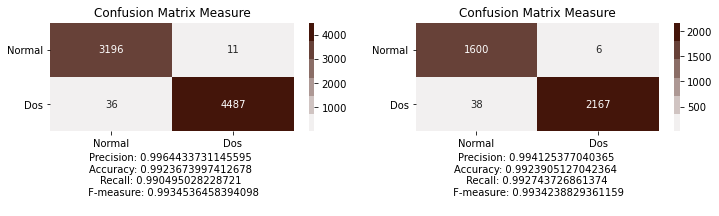

Cross validation metrics for Decision tree based prediction for Probe
DT prediction for Probe


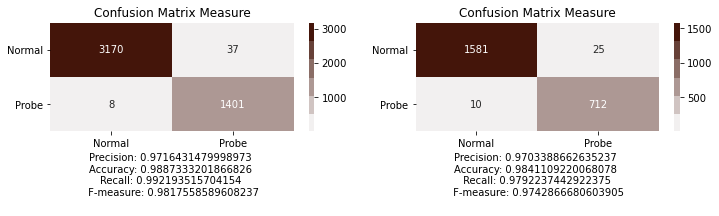

Cross validation metrics for Decision tree based prediction for R2L
DT prediction for R2L


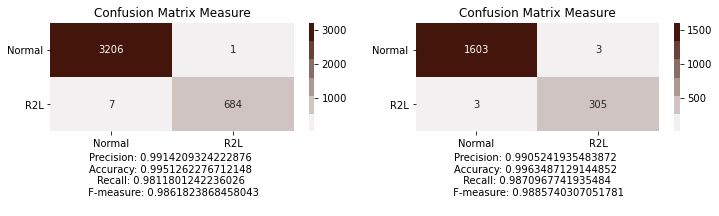

Cross validation metrics for Decision tree based prediction for U2R
DT prediction for U2R


C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


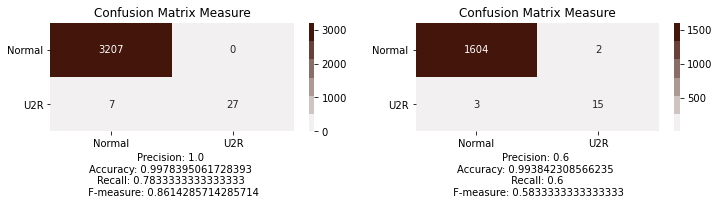

In [27]:
# Cross validation metrics for Decision tree based prediction
clf = DecisionTreeClassifier(random_state=0)

print("Cross validation metrics for Decision tree based prediction for DoS")
training_predict_and_metrics(clf, train_dos_x, train_dos_y, test_dos_x, test_dos_y, 'DT', 'Dos')

print("Cross validation metrics for Decision tree based prediction for Probe")
training_predict_and_metrics(clf, train_probe_x, train_probe_y, test_probe_x, test_probe_y, 'DT', 'Probe')

print("Cross validation metrics for Decision tree based prediction for R2L")
training_predict_and_metrics(clf, train_r2l_x, train_r2l_y, test_r2l_x, test_r2l_y, 'DT', 'R2L')

print("Cross validation metrics for Decision tree based prediction for U2R")
training_predict_and_metrics(clf, train_u2r_x, train_u2r_y, test_u2r_x, test_u2r_y, 'DT', 'U2R')

Hyper tuning of DT

In [28]:
from sklearn.model_selection import GridSearchCV


dt_classifier = DecisionTreeClassifier(random_state=42)

# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

grid_search = GridSearchCV(estimator=dt_classifier, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")
grid_search.fit(train_dos_x.astype(int), train_dos_y)
grid_search.best_estimator_

Fitting 4 folds for each of 50 candidates, totalling 200 fits


DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=10,
                       random_state=42)

In [29]:
clf = DecisionTreeClassifier(criterion='gini', min_samples_leaf=30, random_state=0)
clt = clf.fit(train_dos_x.astype(int), train_dos_y)
y_pred = clf.predict(test_dos_x.astype(int))

from sklearn.metrics import classification_report, confusion_matrix
print('confusion_matrix:')
print(confusion_matrix(test_dos_y, y_pred))
print('\nclassification_report:')
print(classification_report(test_dos_y, y_pred))

confusion_matrix:
[[1581   25]
 [ 243 1962]]

classification_report:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92      1606
           1       0.99      0.89      0.94      2205

    accuracy                           0.93      3811
   macro avg       0.93      0.94      0.93      3811
weighted avg       0.94      0.93      0.93      3811



<h3>SVM</h3>

Cross validation metrics for SVM based prediction for DoS
SVM prediction for Dos


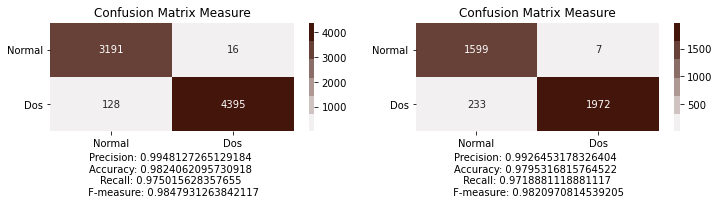

Cross validation metrics for SVM based prediction for Probe
SVM prediction for Probe


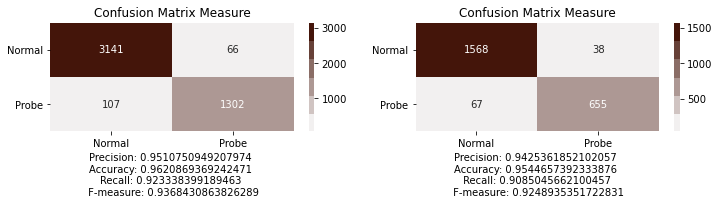

Cross validation metrics for SVM based prediction for R2L
SVM prediction for R2L


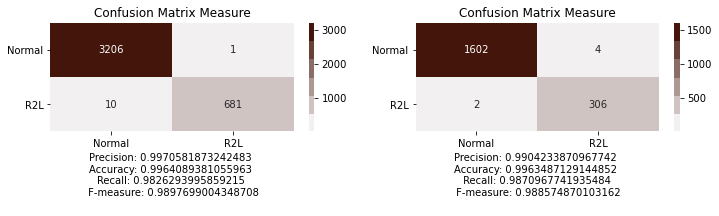

Cross validation metrics for SVM based prediction for U2R
SVM prediction for U2R


C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


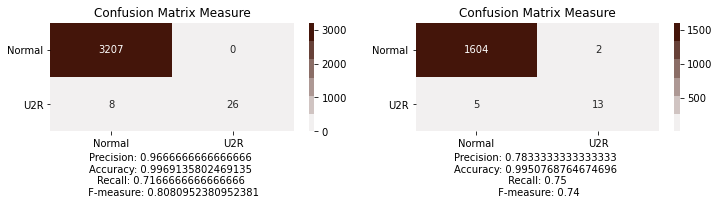

In [30]:
from sklearn.svm import SVC

# Cross validation metrics for Decision tree based prediction
clf = SVC(kernel="linear", C=1, random_state=0)

print("Cross validation metrics for SVM based prediction for DoS")
training_predict_and_metrics(clf, train_dos_x, train_dos_y, test_dos_x, test_dos_y, 'SVM', 'Dos')

print("Cross validation metrics for SVM based prediction for Probe")
training_predict_and_metrics(clf, train_probe_x, train_probe_y, test_probe_x, test_probe_y, 'SVM', 'Probe')

print("Cross validation metrics for SVM based prediction for R2L")
training_predict_and_metrics(clf, train_r2l_x, train_r2l_y, test_r2l_x, test_r2l_y, 'SVM', 'R2L')

print("Cross validation metrics for SVM based prediction for U2R")
training_predict_and_metrics(clf, train_u2r_x, train_u2r_y, test_u2r_x, test_u2r_y, 'SVM', 'U2R')

Hyper tuning of SVM

In [31]:
from sklearn.model_selection import RandomizedSearchCV


parameters = {
#     "gamma": reciprocal(0.001, 0.1), 
    "C": [1,10]}

classifier_svm = SVC(kernel="linear", random_state=0)

randomised_search_cv = RandomizedSearchCV(
    classifier_svm, 
    parameters,
    n_iter=10, 
    cv=3)
randomised_search_cv.fit(train_dos_x.astype(int), train_dos_y)
randomised_search_cv.best_estimator_

C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


SVC(C=1, kernel='linear', random_state=0)

In [32]:
clf = SVC(kernel="linear", C=1, random_state=0)
clt = clf.fit(train_dos_x.astype(int), train_dos_y)
y_pred = clf.predict(test_dos_x.astype(int))

from sklearn.metrics import classification_report, confusion_matrix
print('confusion_matrix:')
print(confusion_matrix(test_dos_y, y_pred))
print('\nclassification_report:')
print(classification_report(test_dos_y, y_pred))

confusion_matrix:
[[1599    7]
 [ 233 1972]]

classification_report:
              precision    recall  f1-score   support

           0       0.87      1.00      0.93      1606
           1       1.00      0.89      0.94      2205

    accuracy                           0.94      3811
   macro avg       0.93      0.94      0.94      3811
weighted avg       0.94      0.94      0.94      3811



<h1>MLP</h1>

Cross validation metrics for MLPClassifier based prediction for DoS
MLP prediction for Dos


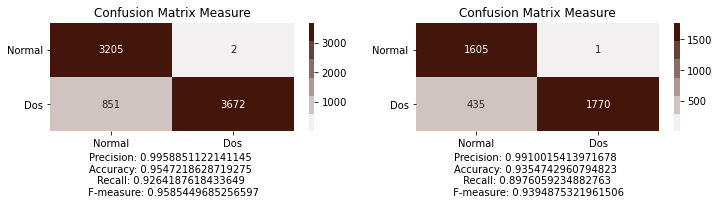

Cross validation metrics for MLPClassifier based prediction for Probe
MLP prediction for Probe


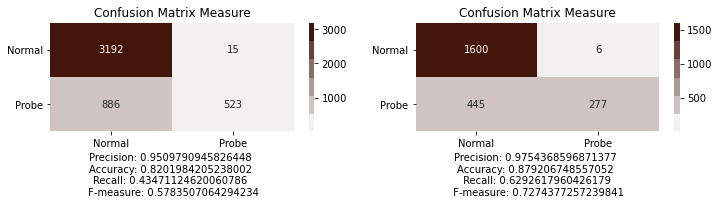

Cross validation metrics for MLPClassifier based prediction for R2L
MLP prediction for R2L


C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defin

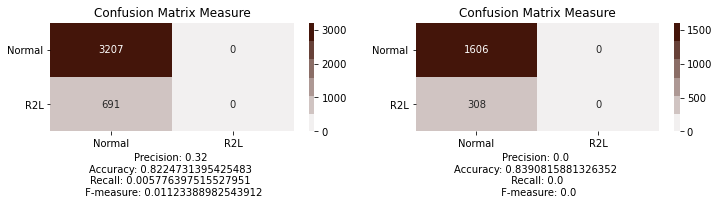

Cross validation metrics for MLPClassifier based prediction for U2R
MLP prediction for U2R


C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defin

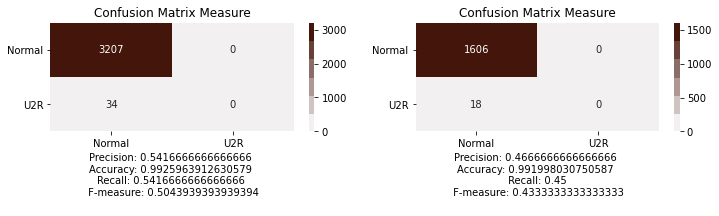

In [33]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='adam',
                    random_state=0,
                    hidden_layer_sizes=(5, 5),  
                    max_iter=100,
                    learning_rate_init=0.3
                   )

print("Cross validation metrics for MLPClassifier based prediction for DoS")
training_predict_and_metrics(clf, train_dos_x, train_dos_y, test_dos_x, test_dos_y, 'MLP', 'Dos')

print("Cross validation metrics for MLPClassifier based prediction for Probe")
training_predict_and_metrics(clf, train_probe_x, train_probe_y, test_probe_x, test_probe_y, 'MLP', 'Probe')

print("Cross validation metrics for MLPClassifier based prediction for R2L")
training_predict_and_metrics(clf, train_r2l_x, train_r2l_y, test_r2l_x, test_r2l_y, 'MLP', 'R2L')

print("Cross validation metrics for MLPClassifier based prediction for U2R")
training_predict_and_metrics(clf, train_u2r_x, train_u2r_y, test_u2r_x, test_u2r_y, 'MLP', 'U2R')

Hyper tuning of MLP

In [34]:
mlp_classifier = MLPClassifier(max_iter=100)

parameter_space = {
    'hidden_layer_sizes': [(100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

grid_search = GridSearchCV(mlp_classifier, parameter_space, n_jobs=-1, cv=3)
grid_search.fit(train_dos_x.astype(int), train_dos_y)
grid_search.best_estimator_

MLPClassifier(learning_rate='adaptive', max_iter=100)

In [35]:
clf = MLPClassifier(solver='adam',
                    random_state=22,
                    hidden_layer_sizes=(5, 5),  
                    max_iter=100,
                    learning_rate_init=0.3
                   )
clf.fit(train_dos_x.astype(int), train_dos_y)
y_pred = clf.predict(test_dos_x.astype(int))

from sklearn.metrics import classification_report, confusion_matrix
print('confusion_matrix:')
print(confusion_matrix(test_dos_y, y_pred))
print('\nclassification_report:')
print(classification_report(test_dos_y, y_pred))

confusion_matrix:
[[1604    2]
 [ 618 1587]]

classification_report:
              precision    recall  f1-score   support

           0       0.72      1.00      0.84      1606
           1       1.00      0.72      0.84      2205

    accuracy                           0.84      3811
   macro avg       0.86      0.86      0.84      3811
weighted avg       0.88      0.84      0.84      3811



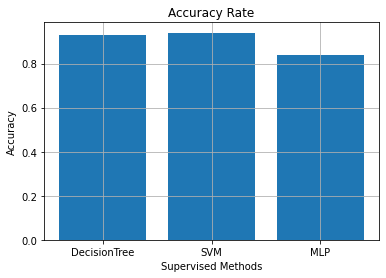

In [36]:
# Comparison between DT, SVM and MLP

x_axis = ['DecisionTree','SVM','MLP']
y_axis = [0.93,0.94,0.84]
plt.xlabel('Supervised Methods')
plt.ylabel('Accuracy')
plt.title('Accuracy Rate')
plt.bar(x_axis,y_axis)
plt.grid()
plt.show()